# A Guided Tour of LSST Calexps
<br>Owner(s): **David Shupe** ([@stargaser](https://github.com/LSSTScienceCollaborations/StackClub/issues/new?body=@stargaser))
<br>Last Verified to Run: **2019-08-13**
<br>Verified Stack Release: **v18.1.0**

We'll inspect a visit image ``calexp`` object, and then show how a coadd image differs.

### Learning Objectives:

After working through this tutorial you should be able to follow some best practices when working with LSST ``calexp`` (image) objects.

### Logistics
This notebook is intended to be runnable on `lsst-lsp-stable.ncsa.illinois.edu` from a local git clone of https://github.com/LSSTScienceCollaborations/StackClub.

## Set-up

In [1]:
from pprint import pprint

In [2]:
from lsst.daf.persistence import Butler

In [3]:
import lsst.afw.display as afw_display

### Retrieving and inspecting a calexp

For the first part of this tutorial we will use simulated LSST data from Twinkles, see https://github.com/LSSTDESC/Twinkles/blob/master/README.md

Define a data directory and create a Butler

In [4]:
datadir = '/project/shared/data/Twinkles_subset/output_data_v2'
butler = Butler(datadir)

Other notebooks show how to view what data are available in a Butler object. Here we get a specific one.

In [5]:
dataId = {'filter': 'r', 'raft': '2,2', 'sensor': '1,1', 'visit': 235}
calexp = butler.get('calexp', **dataId)

### Image planes / pixel data

In terms of pixel data, a calexp contains an image, a mask, and a variance.

Let's see how to access the image.

In [6]:
calexp.image

lsst.afw.image.image.image.ImageF=[[ 33.70561    -37.294224    38.705997   ...  28.236465    45.24491
   23.253298  ]
 [-36.29126     31.708914    27.709076   ...  45.227432    15.235818
   -9.755736  ]
 [  1.7118104   52.711983    19.71215    ...  -0.78154063  19.22678
  -65.76478   ]
 ...
 [ 25.326166    57.32579     55.32548    ... -48.879063    25.122355
   32.12382   ]
 [ 81.34173     55.341354    93.34099    ... -15.883663   -15.882242
   -2.880832  ]
 [ 61.357323    59.35694     54.356567   ...  -2.8882744  -57.88685
  -38.885437  ]], bbox=(minimum=(0, 0), maximum=(3999, 4071))

To show the pixel data, we will make use of the matplotlib backend to `lsst.afw.display`.

Due to current limitations of this backend, the display must be defined and used in the same code cell, much as matplotlib commands in a notebook must all be in one cell to produce a plot.

In [7]:
%matplotlib inline

If the entire calexp is displayed, masks will be overlaid. Here we will eschew the mask display by showing only the image.

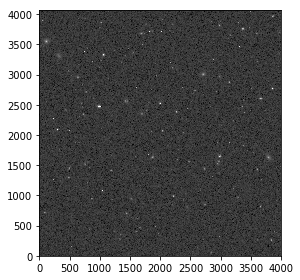

In [8]:
display1 = afw_display.Display(frame=1, backend='matplotlib')
display1.scale("asinh", "zscale")
display1.mtv(calexp.image)

To access the pixel values as an array, use the `.array` attribute.

In [9]:
data = calexp.image.array
data

array([[ 33.70561   , -37.294224  ,  38.705997  , ...,  28.236465  ,
         45.24491   ,  23.253298  ],
       [-36.29126   ,  31.708914  ,  27.709076  , ...,  45.227432  ,
         15.235818  ,  -9.755736  ],
       [  1.7118104 ,  52.711983  ,  19.71215   , ...,  -0.78154063,
         19.22678   , -65.76478   ],
       ...,
       [ 25.326166  ,  57.32579   ,  55.32548   , ..., -48.879063  ,
         25.122355  ,  32.12382   ],
       [ 81.34173   ,  55.341354  ,  93.34099   , ..., -15.883663  ,
        -15.882242  ,  -2.880832  ],
       [ 61.357323  ,  59.35694   ,  54.356567  , ...,  -2.8882744 ,
        -57.88685   , -38.885437  ]], dtype=float32)

In [10]:
data.__class__

numpy.ndarray

Let's list all the methods for our calexp.

In [11]:
calexp_methods = [m for m in dir(calexp) if not m.startswith('_')]

In [12]:
calexp_methods

['Factory',
 'clone',
 'convertD',
 'convertF',
 'dtype',
 'getBBox',
 'getCalib',
 'getCutout',
 'getDetector',
 'getDimensions',
 'getFilter',
 'getHeight',
 'getImage',
 'getInfo',
 'getMask',
 'getMaskedImage',
 'getMetadata',
 'getPhotoCalib',
 'getPsf',
 'getVariance',
 'getWcs',
 'getWidth',
 'getX0',
 'getXY0',
 'getY0',
 'hasPsf',
 'hasWcs',
 'image',
 'mask',
 'maskedImage',
 'readFits',
 'readFitsWithOptions',
 'setCalib',
 'setDetector',
 'setFilter',
 'setImage',
 'setInfo',
 'setMask',
 'setMaskedImage',
 'setMetadata',
 'setPhotoCalib',
 'setPsf',
 'setVariance',
 'setWcs',
 'setXY0',
 'subset',
 'variance',
 'writeFits',
 'writeFitsWithOptions']

Access the masked Image

In [13]:
calexp.maskedImage

lsst.afw.image.maskedImage.maskedImage.MaskedImageF=(image=[[ 33.70561    -37.294224    38.705997   ...  28.236465    45.24491
   23.253298  ]
 [-36.29126     31.708914    27.709076   ...  45.227432    15.235818
   -9.755736  ]
 [  1.7118104   52.711983    19.71215    ...  -0.78154063  19.22678
  -65.76478   ]
 ...
 [ 25.326166    57.32579     55.32548    ... -48.879063    25.122355
   32.12382   ]
 [ 81.34173     55.341354    93.34099    ... -15.883663   -15.882242
   -2.880832  ]
 [ 61.357323    59.35694     54.356567   ...  -2.8882744  -57.88685
  -38.885437  ]],
mask=[[16 16 16 ... 16 16 16]
 [16 16 16 ... 16 16 16]
 [16 16 16 ... 16 16 16]
 ...
 [16 16 16 ... 16 16 16]
 [16 16 16 ... 16 16 16]
 [16 16 16 ... 16 16 16]], maskPlaneDict={'BAD': 0, 'CR': 3, 'DETECTED': 5, 'DETECTED_NEGATIVE': 6, 'EDGE': 4, 'INTRP': 2, 'NO_DATA': 8, 'SAT': 1, 'SUSPECT': 7}
variance=[[854. 783. 859. ... 846. 863. 841.]
 [784. 852. 848. ... 863. 833. 808.]
 [822. 873. 840. ... 817. 837. 752.]
 ...
 [845.

Access the variance object and the underlying Numpy array

In [14]:
calexp.variance

lsst.afw.image.image.image.ImageF=[[854. 783. 859. ... 846. 863. 841.]
 [784. 852. 848. ... 863. 833. 808.]
 [822. 873. 840. ... 817. 837. 752.]
 ...
 [845. 877. 875. ... 772. 846. 853.]
 [901. 875. 913. ... 805. 805. 818.]
 [881. 879. 874. ... 818. 763. 782.]], bbox=(minimum=(0, 0), maximum=(3999, 4071))

In [15]:
calexp.variance.array

array([[854., 783., 859., ..., 846., 863., 841.],
       [784., 852., 848., ..., 863., 833., 808.],
       [822., 873., 840., ..., 817., 837., 752.],
       ...,
       [845., 877., 875., ..., 772., 846., 853.],
       [901., 875., 913., ..., 805., 805., 818.],
       [881., 879., 874., ..., 818., 763., 782.]], dtype=float32)

Access the mask and its underlying array

In [16]:
calexp.mask

lsst.afw.image.image.image.MaskX=[[16 16 16 ... 16 16 16]
 [16 16 16 ... 16 16 16]
 [16 16 16 ... 16 16 16]
 ...
 [16 16 16 ... 16 16 16]
 [16 16 16 ... 16 16 16]
 [16 16 16 ... 16 16 16]], bbox=(minimum=(0, 0), maximum=(3999, 4071)), maskPlaneDict={'BAD': 0, 'CR': 3, 'DETECTED': 5, 'DETECTED_NEGATIVE': 6, 'EDGE': 4, 'INTRP': 2, 'NO_DATA': 8, 'SAT': 1, 'SUSPECT': 7}

In [17]:
calexp.mask.array

array([[16, 16, 16, ..., 16, 16, 16],
       [16, 16, 16, ..., 16, 16, 16],
       [16, 16, 16, ..., 16, 16, 16],
       ...,
       [16, 16, 16, ..., 16, 16, 16],
       [16, 16, 16, ..., 16, 16, 16],
       [16, 16, 16, ..., 16, 16, 16]], dtype=int32)

Get the dimensions of the image, mask and variance

In [18]:
calexp.getDimensions()

Extent2I(4000, 4072)

The image, maskedImage and Exposure objects in `lsst.afw.display` include information on **LSST pixels**, which are 0-based with an optional offset.

For a calexp these are usually zero.

In [19]:
calexp.getXY0()

Point2I(0, 0)

In [20]:
calexp.getX0(), calexp.getY0()

(0, 0)

### Metadata

Access the wcs object

In [21]:
wcs = calexp.getWcs()
wcs

The WCS object can be used e.g. to convert pixel coordinates into sky coordinates

In [22]:
wcs.pixelToSky(100.0, 100.0)

SpherePoint(52.86196407219792*geom.degrees, -27.363616065026967*geom.degrees)

Let's try accessing the metadata, and see what (header) keywords we have.

In [23]:
metadata = calexp.getMetadata()
pprint(metadata.toDict())

{'AERIND': -1.28,
 'AERTAU': 0.02,
 'AFILE0': 'atmospherescreen_235_0',
 'AFILE1': 'atmospherescreen_235_1',
 'AFILE2': 'atmospherescreen_235_2',
 'AFILE3': 'atmospherescreen_235_3',
 'AFILE4': 'atmospherescreen_235_4',
 'AFILE5': 'atmospherescreen_235_5',
 'AFILE6': 'atmospherescreen_235_6',
 'APRMODE': 0,
 'AP_ORDER': 5,
 'ATMDISP': 1,
 'ATMFILE': 7,
 'AZIJITT': 0.02,
 'A_ORDER': 4,
 'BGMEAN': 821.819582836419,
 'BGVAR': 0.663576048688008,
 'BLOOMNG': 1,
 'BOD 0 0': 0.0,
 'BOD 0 1': 0.0,
 'BOD 0 2': 0.0,
 'BOD 0 3': -4.96035407e-06,
 'BOD 0 4': 0.000122319924,
 'BOD 0 5': -1.56242493e-05,
 'BOD 1 0': 0.0,
 'BOD 1 1': 0.0,
 'BOD 1 2': 0.0,
 'BOD 1 3': 9.37210978e-05,
 'BOD 1 4': -0.000177507683,
 'BOD 1 5': -2.95466139e-05,
 'BOD 2 0': 0.0,
 'BOD 2 1': 0.0,
 'BOD 2 2': 0.0,
 'BOD 2 3': -4.96035407e-06,
 'BOD 2 4': 0.000122319924,
 'BOD 2 5': -1.56242493e-05,
 'BOD 3 0': 0.0,
 'BOD 3 1': 0.0,
 'BOD 3 2': 0.0,
 'BOD 3 3': 0.0,
 'BOD 3 4': 0.0,
 'BOD 3 5': 0.0,
 'BOD 4 0': 0.0,
 'BOD 4 1

In [24]:
metadata.get('CCDTEMP')

173.0

### Better metadata: ExposureInfo and VisitInfo

For many purposes, information about an exposure is obtainable via the ExposureInfo and VisitInfo classes.

In [25]:
calexp_info = calexp.getInfo()

In [26]:
visit_info = calexp_info.getVisitInfo()

In [27]:
[m for m in dir(visit_info) if not m.startswith('_')]

['getBoresightAirmass',
 'getBoresightAzAlt',
 'getBoresightHourAngle',
 'getBoresightParAngle',
 'getBoresightRaDec',
 'getBoresightRotAngle',
 'getDarkTime',
 'getDate',
 'getEra',
 'getExposureId',
 'getExposureTime',
 'getLocalEra',
 'getObservatory',
 'getRotType',
 'getUt1',
 'getWeather',
 'isPersistable',
 'readFits',
 'writeFits']

Obtain weather information for this visit

In [28]:
visit_info.getWeather()

Weather(20, 69327.6, nan)

Check if this calexp has a valid polygon

In [29]:
calexp_info.hasValidPolygon()

False

Since there is no valid polygon, the `polygon` variable in the next cell gets the value of None.

In [30]:
polygon = calexp_info.getValidPolygon()

The calexp is not a coadd so this method returns False.

In [31]:
calexp_info.hasCoaddInputs()

False

Does the calexp contain transmission curve information?

In [32]:
calexp_info.hasTransmissionCurve()

False

Does the calexp contain a World Coordinate System?

In [33]:
calexp_info.hasWcs()

True

Does the calexp have a detector?

In [34]:
calexp_info.hasDetector()

True

In [35]:
[m for m in dir(calexp_info.getDetector()) if not m.startswith('_')]

['getAmpInfoCatalog',
 'getBBox',
 'getCenter',
 'getCorners',
 'getCrosstalk',
 'getId',
 'getName',
 'getNativeCoordSys',
 'getOrientation',
 'getPhysicalType',
 'getPixelSize',
 'getSerial',
 'getTransform',
 'getTransformMap',
 'getType',
 'hasCrosstalk',
 'hasTransform',
 'isPersistable',
 'makeCameraSys',
 'readFits',
 'transform',
 'writeFits']

Does the calexp have an aperture correction map?

In [36]:
calexp_info.hasApCorrMap()

True

Let's get the aperture correction map and print some information about it

In [37]:
apCorrMap = calexp_info.getApCorrMap()

In [38]:
for k in apCorrMap.keys():
    print(k, apCorrMap.get(k))

base_GaussianFlux_flux ChebyshevBoundedField ((3,3,) coefficients in y,x) on Box2I(Point2I(0, 0), Extent2I(4000, 4072))
base_GaussianFlux_fluxSigma ChebyshevBoundedField ((1,1,) coefficients in y,x) on Box2I(Point2I(0, 0), Extent2I(4000, 4072))
base_PsfFlux_flux ChebyshevBoundedField ((3,3,) coefficients in y,x) on Box2I(Point2I(0, 0), Extent2I(4000, 4072))
base_PsfFlux_fluxSigma ChebyshevBoundedField ((1,1,) coefficients in y,x) on Box2I(Point2I(0, 0), Extent2I(4000, 4072))
ext_photometryKron_KronFlux_flux ChebyshevBoundedField ((3,3,) coefficients in y,x) on Box2I(Point2I(0, 0), Extent2I(4000, 4072))
ext_photometryKron_KronFlux_fluxSigma ChebyshevBoundedField ((1,1,) coefficients in y,x) on Box2I(Point2I(0, 0), Extent2I(4000, 4072))


### Image PSF

Check if our calexp has a PSF

In [39]:
calexp.hasPsf()

True

In [40]:
psf = calexp.getPsf()

The PSF object can be used to get a realization of a PSF at a specific point

In [41]:
from lsst.geom import PointD
psfimage = psf.computeImage(PointD(100.,100.))

Visualize the PSF

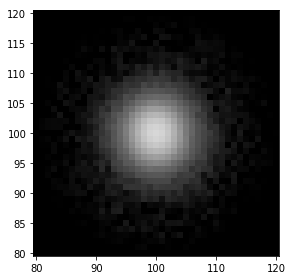

In [42]:
display1 = afw_display.Display(frame=1, backend='matplotlib')
display1.scale('asinh', min=0.0, max=1.e-3, unit='absolute')
display1.mtv(psfimage)

Access the calibration object which can be used to convert instrumental magnitudes to AB magnitudes

In [43]:
calib = calexp.getPhotoCalib()
calib

PhotoCalib(spatially constant with mean: 0.568474 error: 0.000143455)

### Image cutouts

We can make a cutout from the calexp in our session.

In [44]:
import lsst.afw.geom as afwGeom
import lsst.afw.image as afwImage

In [45]:
bbox = afwGeom.Box2I()
bbox.include(afwGeom.Point2I(2200,3200))
bbox.include(afwGeom.Point2I(2800,3800))
cutout = calexp[bbox]

Notice that when the image is displayed, the pixel values relate to the parent image.

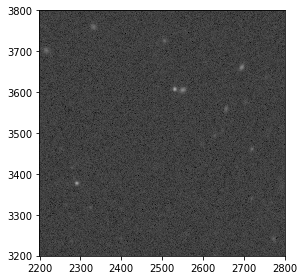

In [46]:
display1 = afw_display.Display(frame=1, backend='matplotlib')
display1.scale('asinh', 'zscale')
display1.mtv(cutout.image)

The coordinate of the lower-left-hand pixel is XY0.

In [47]:
cutout.getXY0()

Point2I(2200, 3200)

If a cutout was all that was desired from the start, we could have used our BoundingBox together with our Butler to have read in only the cutout.

In [48]:
cutout_calexp = butler.get('calexp_sub', bbox=bbox, dataId=dataId)
cutout_calexp.getDimensions()

Extent2I(601, 601)

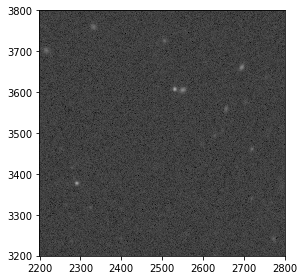

In [49]:
display1 = afw_display.Display(frame=1, backend='matplotlib')
display1.scale('asinh', 'zscale')
display1.mtv(cutout_calexp.image)

The `clone` method makes a deep copy. The result can be sliced with a BoundingBox

In [50]:
clone_cutout = calexp.clone()[bbox]

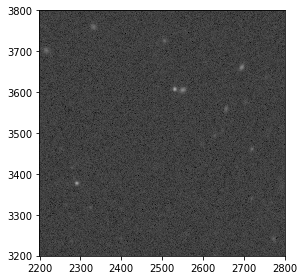

In [51]:
display1 = afw_display.Display(frame=1, backend='matplotlib')
display1.scale("asinh", "zscale")
display1.mtv(clone_cutout.image)

## Repeat for a coadd

For this last section, we will use Hyper Suprime-Cam (HSC) data that has been modified for tutorial purposes.

In [52]:
coadd_butler = Butler('/project/shared/data/with-globular/')

In [53]:
coadd_butler.getKeys('deepCoadd_calexp')

{'filter': str, 'tract': int, 'patch': str}

We cannot use queryMetadata to look up what is available for coadds. This will be fixed in Butler Gen3.

For the time being, open a terminal and list files in `/project/shared/data/with-globular/` to see what's available. Or just carry on using the following example:

In [54]:
dataId = {'filter':'HSC-I', 'tract':9813, 'patch':'4,4'}

Retrieve a coadd `calexp`, and see what methods it provides.

In [55]:
coadd = coadd_butler.get('deepCoadd_calexp', dataId)

In [56]:
coadd_methods = [m for m in dir(coadd) if not m.startswith('_')]

In [57]:
coadd_methods

['Factory',
 'clone',
 'convertD',
 'convertF',
 'dtype',
 'getBBox',
 'getCalib',
 'getCutout',
 'getDetector',
 'getDimensions',
 'getFilter',
 'getHeight',
 'getImage',
 'getInfo',
 'getMask',
 'getMaskedImage',
 'getMetadata',
 'getPhotoCalib',
 'getPsf',
 'getVariance',
 'getWcs',
 'getWidth',
 'getX0',
 'getXY0',
 'getY0',
 'hasPsf',
 'hasWcs',
 'image',
 'mask',
 'maskedImage',
 'readFits',
 'readFitsWithOptions',
 'setCalib',
 'setDetector',
 'setFilter',
 'setImage',
 'setInfo',
 'setMask',
 'setMaskedImage',
 'setMetadata',
 'setPhotoCalib',
 'setPsf',
 'setVariance',
 'setWcs',
 'setXY0',
 'subset',
 'variance',
 'writeFits',
 'writeFitsWithOptions']

In [58]:
set(coadd_methods).symmetric_difference(set(calexp_methods))

set()

The result of the `set` command above shows that a calexp and a coadd have the same methods. This is expected, because they are the same class.

In [59]:
print(calexp.__class__, coadd.__class__)

<class 'lsst.afw.image.exposure.exposure.ExposureF'> <class 'lsst.afw.image.exposure.exposure.ExposureF'>


A `deepCoadd_calexp` and a visit `calexp` differ mainly in the masks and the xy0 value.

In [60]:
calexp.mask.getMaskPlaneDict()

{'BAD': 0,
 'BRIGHT_OBJECT': 9,
 'CLIPPED': 10,
 'CR': 3,
 'CROSSTALK': 11,
 'DETECTED': 5,
 'DETECTED_NEGATIVE': 6,
 'EDGE': 4,
 'INEXACT_PSF': 12,
 'INTRP': 2,
 'NOT_DEBLENDED': 13,
 'NO_DATA': 8,
 'REJECTED': 14,
 'SAT': 1,
 'SENSOR_EDGE': 15,
 'SUSPECT': 7,
 'UNMASKEDNAN': 16}

In [61]:
coadd.mask.getMaskPlaneDict()

{'BAD': 0,
 'BRIGHT_OBJECT': 9,
 'CLIPPED': 10,
 'CR': 3,
 'CROSSTALK': 11,
 'DETECTED': 5,
 'DETECTED_NEGATIVE': 6,
 'EDGE': 4,
 'INEXACT_PSF': 12,
 'INTRP': 2,
 'NOT_DEBLENDED': 13,
 'NO_DATA': 8,
 'REJECTED': 14,
 'SAT': 1,
 'SENSOR_EDGE': 15,
 'SUSPECT': 7,
 'UNMASKEDNAN': 16}

In [62]:
coadd.getXY0()

Point2I(15900, 15900)

Display the coadd with all masks visible.

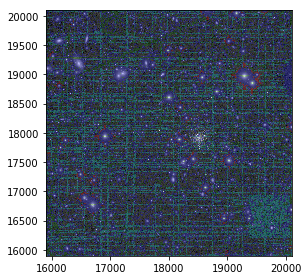

In [63]:
display1 = afw_display.Display(frame=1, backend='matplotlib')
display1.scale("asinh", "zscale")
display1.mtv(coadd)

Display the image data only with a zoom and pan to some nice-looking galaxies, to show off our hyperbolic arcsine stretch:

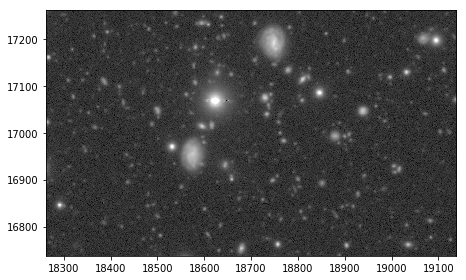

In [64]:
display1 = afw_display.Display(frame=1, backend='matplotlib')
display1.scale("asinh", "zscale")
display1.mtv(coadd.image)
display1.zoom(16)
display1.pan(18700, 17000)